In [ ]:
# To do:
# special thank you to ... 
# create markdown sections (including fMRIPrep website, nilearn website etc.) and put references
# improve comments and add print statements to facilitate human understanding
# add error tests
# Different pipelines have different n of participants - remove extra participants:
    # exclude M006, M107, M108
# do a t-test/Wilcoxon Signed Rank Test to check whether the differences between pipelines are significant

In [ ]:
# This script is to be used on pre-processed fMRI timeseries data 

In [1]:
import glob
import os

import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt

import nibabel as nib
from nilearn import image
from nilearn import plotting
from nilearn import datasets
from nilearn import input_data
from nilearn.input_data import NiftiMapsMasker
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure


In [2]:
# import atlas with ROIs to be used for the connectivity analysis

# the MSDL (multi-subject dictionary learning; {cite}Varoquaux_2011) atlas defines a set of probabilistic ROIs across the brain.
# import a different atlas, if you prefer

#msdl_atlas = datasets.fetch_atlas_msdl()

#msdl_coords = msdl_atlas.region_coords
#n_regions = len(msdl_coords)

#print(f'MSDL has {n_regions} ROIs, part of the following networks :\n{np.unique(msdl_atlas.networks)}.')

harv_oxf_atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
rois = harv_oxf_atlas.labels
n_regions = len(rois)
print(f'This atlas has {n_regions} ROIs.')

This atlas has 49 ROIs.


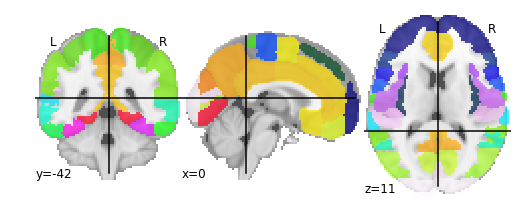

In [3]:
# view the atlas
# plotting.plot_prob_atlas(msdl_atlas.maps)
plotting.plot_roi(harv_oxf_atlas.maps)

In [4]:
# apply a NiftiMapsMasker as the MSDL atlas is probabilistic
# !! if you're using a deterministic atlas, then use a NiftiLabelsMasker object !!

#masker = input_data.NiftiMapsMasker(
#    msdl_atlas.maps, resampling_target="data",
#    t_r=2, detrend=True,
#    low_pass=0.1, high_pass=0.01).fit()

masker = input_data.NiftiLabelsMasker(
    harv_oxf_atlas.maps, resampling_target="data",
    t_r=2, detrend=True,
    low_pass=0.1, high_pass=0.01).fit()

In [5]:
pipeline_list = sorted(glob.glob("/Volumes/Seagate Dr/PhD/Chapter 1/*"))
print(*pipeline_list, sep='\n')
print(type(pipeline_list))

/Volumes/Seagate Dr/PhD/Chapter 1/3Echo_AFNI
/Volumes/Seagate Dr/PhD/Chapter 1/4Echo_AFNI
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_1echo
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_1echo_SDC
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_3echo
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_3echo_SDC
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_3echo_T2s
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_3echo_T2s_SDC
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_4echo
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_4echo_SDC
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_4echo_T2s
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_4echo_T2s_SDC
<class 'list'>


In [6]:
def quality_check(pipeline_list):
    for n in range(len(pipeline_list)):
        current_pipeline = pipeline_list[n]
        print(current_pipeline)
        fmri_img_path = os.path.join(current_pipeline, "*.gz")
        print(fmri_img_path)
        fmri_img = sorted(glob.glob(fmri_img_path))
        print(*fmri_img, sep='\n')
        # check the dimensions of a single participant fMRI data to see if it makes sense!
        fmri_img_single = nib.load(fmri_img[0])
        print(fmri_img_single.shape)

In [7]:
quality_check(pipeline_list)

/Volumes/Seagate Dr/PhD/Chapter 1/3Echo_AFNI
/Volumes/Seagate Dr/PhD/Chapter 1/3Echo_AFNI/*.gz
/Volumes/Seagate Dr/PhD/Chapter 1/3Echo_AFNI/M005B_f_e123_medn_nlw.nii.gz
/Volumes/Seagate Dr/PhD/Chapter 1/3Echo_AFNI/M007A_f_e123_medn_nlw.nii.gz
/Volumes/Seagate Dr/PhD/Chapter 1/3Echo_AFNI/M008A_f_e123_medn_nlw.nii.gz
/Volumes/Seagate Dr/PhD/Chapter 1/3Echo_AFNI/M010A_f_e123_medn_nlw.nii.gz
/Volumes/Seagate Dr/PhD/Chapter 1/3Echo_AFNI/M013B_f_e123_medn_nlw.nii.gz
/Volumes/Seagate Dr/PhD/Chapter 1/3Echo_AFNI/M014A_f_e123_medn_nlw.nii.gz
/Volumes/Seagate Dr/PhD/Chapter 1/3Echo_AFNI/M015C_f_e123_medn_nlw.nii.gz
/Volumes/Seagate Dr/PhD/Chapter 1/3Echo_AFNI/M016C_f_e123_medn_nlw.nii.gz
/Volumes/Seagate Dr/PhD/Chapter 1/3Echo_AFNI/M020B_f_e123_medn_nlw.nii.gz
/Volumes/Seagate Dr/PhD/Chapter 1/3Echo_AFNI/M105B_f_e123_medn_nlw.nii.gz
/Volumes/Seagate Dr/PhD/Chapter 1/3Echo_AFNI/M106C_f_e123_medn_nlw.nii.gz
/Volumes/Seagate Dr/PhD/Chapter 1/3Echo_AFNI/M109C_f_e123_medn_nlw.nii.gz
/Volumes/Seagate 

/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_4echo_T2s_SDC/sub-M114_ses-V1_task-rest_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_4echo_T2s_SDC/sub-M115_ses-V3_task-rest_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_4echo_T2s_SDC/sub-M121_ses-V1_task-rest_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz
(91, 109, 91, 192)



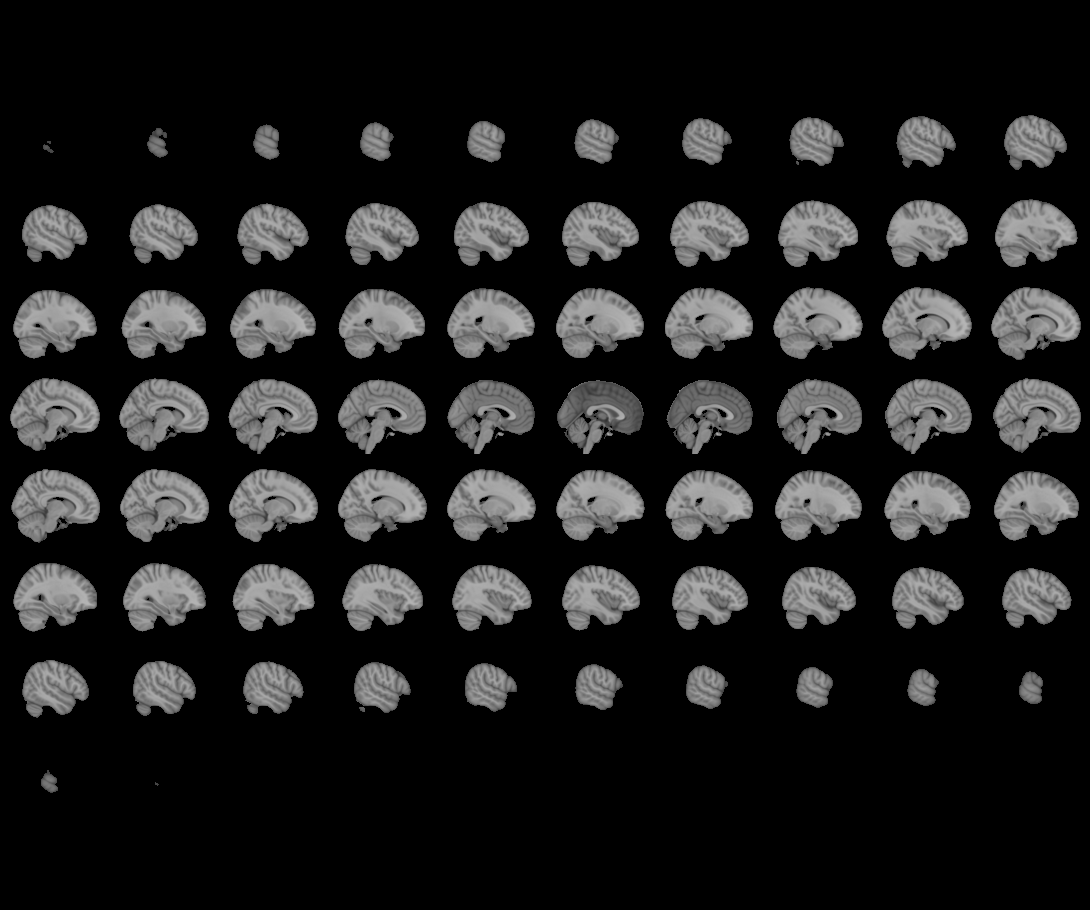
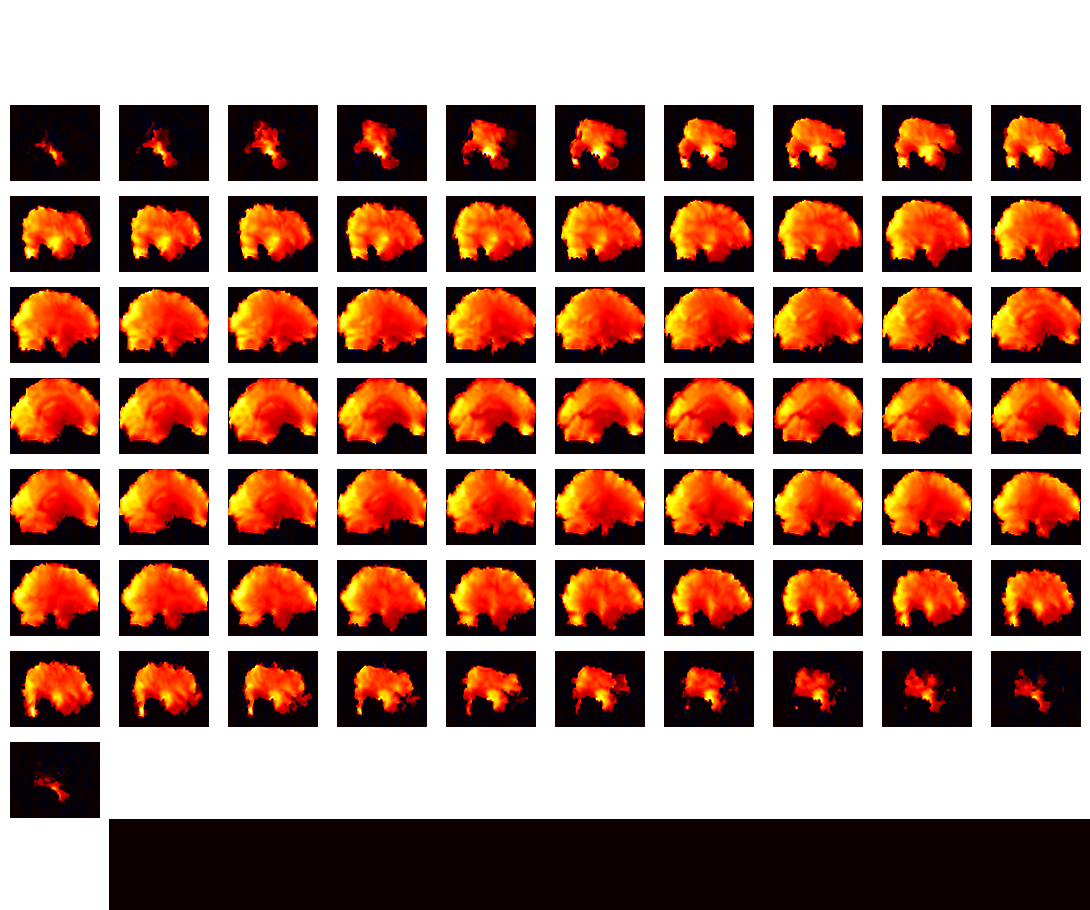

In [5]:
# to look at the mean fMRI brain image for a single participant
# !!!!!!!!!!! ADD THE OTHER LINES !!!!!!!!!!!!!!
# change this line to get your data!
mean_image = image.mean_img(fmri_img_single)
plotting.view_img(mean_image, threshold=None)

In [8]:
# !!!!!!!!!!!!!!!!!!!!!!!!!! TEST THIS !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# calculate the connectivity matrices and the mean functional connectivity (mFC) values (across the brain) for all participants


# create a function that will execute the connectivity analysis and calculate mFC values
def calc_conn_mFC(pipeline_list):
    # choose a pipeline
    for p in range(len(pipeline_list)):
        current_pipeline = pipeline_list[p]
        print("Current pipeline:", current_pipeline)
        #set the list of fMRI files
        fmri_img_path = os.path.join(current_pipeline, "*.gz")
        print(fmri_img_path)
        fmri_img = sorted(glob.glob(fmri_img_path))
        # initiate an empty list that will contain a single mFC value for each participant
        mFC_list = []
        # specify for the number of participants you have
        for n in range(len(fmri_img)):
            # check if this is the right participant
            print("Working on participant:")
            print(fmri_img[n])
            # !!!!!! change this line to get your data !!!!!!!
            # !! it is recommended to remove confounds by using the confounds= option and selecting them from your confounds file
            # it is also a good idea to compare the corrected and uncorrected connectivity matrices
            roi_time_series = masker.transform(fmri_img[n])        
            # calculate a connectivity matrix
            # choose a type of correlation analysis, tangent space embedding is recommended, but it requires that the program is run on all subjects simultaneously
            correlation_measure = ConnectivityMeasure(kind='correlation')
            correlation_matrix = correlation_measure.fit_transform([roi_time_series])[0]
            print("Connectivity matrix calculated.")
            # save the matrix to a csv file, using subject n
            # N.B. matrix file will not have column and row names, i.e. the brain region names. 
            # They have to be added from the atlas that was used for the connectivity analysis when doing the plotting, for instance
            np.savetxt('pipeline'+str(p)+'sub_'+str(n)+'_conn_matrix.csv', correlation_matrix, delimiter=',')
            print('Connectivity matrix for sub'+str(n)+' saved.')
            # calculate mFC and append value to the mFC_list
            mFC = mean(correlation_matrix)
            mFC_list.append(mFC)
            print('mFC_list updated.')
        print('Pipeline'+str(p)+' Analysis Completed.')
        mFC_list = np.array(mFC_list)
        np.savetxt('mFC_list_pipeline'+str(p)+'.csv', mFC_list, delimiter=',')
        print('mFC_list_pipeline'+str(p)+'.csv saved.')
    print("Done.")


In [9]:
#run the FC function
calc_conn_mFC(pipeline_list)

Current pipeline: /Volumes/Seagate Dr/PhD/Chapter 1/3Echo_AFNI
/Volumes/Seagate Dr/PhD/Chapter 1/3Echo_AFNI/*.gz
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/3Echo_AFNI/M005B_f_e123_medn_nlw.nii.gz
Connectivity matrix calculated.
Connectivity matrix for sub0 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/3Echo_AFNI/M007A_f_e123_medn_nlw.nii.gz
Connectivity matrix calculated.
Connectivity matrix for sub1 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/3Echo_AFNI/M008A_f_e123_medn_nlw.nii.gz
Connectivity matrix calculated.
Connectivity matrix for sub2 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/3Echo_AFNI/M010A_f_e123_medn_nlw.nii.gz
Connectivity matrix calculated.
Connectivity matrix for sub3 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/3Echo_AFNI/M013B_f_e123_medn_nlw.nii.gz
Connectivity matrix calculated.
Connectivity matrix f

Connectivity matrix calculated.
Connectivity matrix for sub4 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_1echo/sub-M014_ses-V1_task-rest_echo-2_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz
Connectivity matrix calculated.
Connectivity matrix for sub5 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_1echo/sub-M015_ses-V3_task-rest_echo-2_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz
Connectivity matrix calculated.
Connectivity matrix for sub6 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_1echo/sub-M016_ses-V3_task-rest_echo-2_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz
Connectivity matrix calculated.
Connectivity matrix for sub7 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_1echo/sub-M020_ses-V2_task-rest_echo-2_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz


Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_3echo/sub-M005_ses-V2_task-rest_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz
Connectivity matrix calculated.
Connectivity matrix for sub0 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_3echo/sub-M007_ses-V1_task-rest_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz
Connectivity matrix calculated.
Connectivity matrix for sub1 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_3echo/sub-M008_ses-V1_task-rest_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz
Connectivity matrix calculated.
Connectivity matrix for sub2 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_3echo/sub-M010_ses-V1_task-rest_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz
Connectivity matrix calculated.
Connectivity matrix for sub3 saved.
mFC_list updated.
Working on participant:
/Vol

Connectivity matrix calculated.
Connectivity matrix for sub14 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_3echo_SDC/sub-M114_ses-V1_task-rest_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz
Connectivity matrix calculated.
Connectivity matrix for sub15 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_3echo_SDC/sub-M115_ses-V3_task-rest_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz
Connectivity matrix calculated.
Connectivity matrix for sub16 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_3echo_SDC/sub-M121_ses-V1_task-rest_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz
Connectivity matrix calculated.
Connectivity matrix for sub17 saved.
mFC_list updated.
Pipeline5 Analysis Completed.
mFC_list_pipeline5.csv saved.
Current pipeline: /Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_3echo_T2s
/Volumes/Seagate Dr/PhD/Chapter 1/fMRI

Connectivity matrix calculated.
Connectivity matrix for sub10 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_3echo_T2s_SDC/sub-M109_ses-V3_task-rest_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz
Connectivity matrix calculated.
Connectivity matrix for sub11 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_3echo_T2s_SDC/sub-M110_ses-V1_task-rest_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz
Connectivity matrix calculated.
Connectivity matrix for sub12 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_3echo_T2s_SDC/sub-M111_ses-V2_task-rest_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz
Connectivity matrix calculated.
Connectivity matrix for sub13 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_3echo_T2s_SDC/sub-M113_ses-V1_task-rest_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold

Connectivity matrix calculated.
Connectivity matrix for sub6 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_4echo_SDC/sub-M016_ses-V3_task-rest_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz
Connectivity matrix calculated.
Connectivity matrix for sub7 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_4echo_SDC/sub-M020_ses-V2_task-rest_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz
Connectivity matrix calculated.
Connectivity matrix for sub8 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_4echo_SDC/sub-M105_ses-V2_task-rest_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz
Connectivity matrix calculated.
Connectivity matrix for sub9 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_4echo_SDC/sub-M106_ses-V3_task-rest_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz
Connectivity

Connectivity matrix calculated.
Connectivity matrix for sub2 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_4echo_T2s_SDC/sub-M010_ses-V1_task-rest_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz
Connectivity matrix calculated.
Connectivity matrix for sub3 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_4echo_T2s_SDC/sub-M013_ses-V2_task-rest_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz
Connectivity matrix calculated.
Connectivity matrix for sub4 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_4echo_T2s_SDC/sub-M014_ses-V1_task-rest_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii.gz
Connectivity matrix calculated.
Connectivity matrix for sub5 saved.
mFC_list updated.
Working on participant:
/Volumes/Seagate Dr/PhD/Chapter 1/fMRIPrep_4echo_T2s_SDC/sub-M015_ses-V3_task-rest_space-MNI152NLin6Asym_desc-smoothAROMAnonaggr_bold.nii

In [11]:
# import pandas as pd
# import specific correlation matrix csv files
# or the mFC_list file (especially after kernel restart)
conn_matrix = pd.read_csv('~/Downloads/PhD/Analysis/QC/pipeline0sub_0_conn_matrix.csv', delimiter=',', header=None)
print(conn_matrix)
print(type(conn_matrix))

          0         1         2         3         4         5         6   \
0   1.000000  0.325607  0.492196  0.296988  0.161034  0.299520 -0.019986   
1   0.325607  1.000000  0.245702  0.260056  0.485832  0.517788  0.639740   
2   0.492196  0.245702  1.000000  0.495905 -0.040766  0.369652  0.051040   
3   0.296988  0.260056  0.495905  1.000000  0.500257  0.621260  0.381245   
4   0.161034  0.485832 -0.040766  0.500257  1.000000  0.665984  0.690984   
5   0.299520  0.517788  0.369652  0.621260  0.665984  1.000000  0.613647   
6  -0.019986  0.639740  0.051040  0.381245  0.690984  0.613647  1.000000   
7   0.290736  0.551026  0.612654  0.210846  0.114556  0.465702  0.314134   
8   0.171962  0.467006  0.487616  0.125365  0.020077  0.345483  0.368122   
9   0.296182  0.294728  0.550754  0.101577 -0.188341  0.335990  0.111776   
10  0.267693  0.288196  0.634985  0.075726 -0.108125  0.191262  0.076253   
11  0.296428  0.021335  0.622488  0.100682 -0.318139  0.128425 -0.227866   
12  0.258737

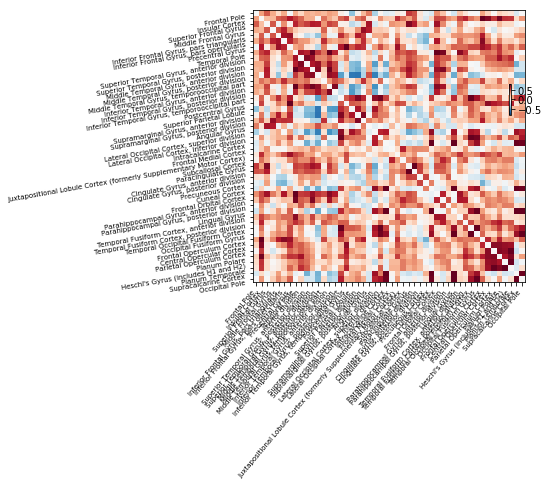

In [24]:
# plot a connectivity matrix
# set this to a matrix of your choice
correlation_matrix = conn_matrix.to_numpy()
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix, 
                     # omit the first label as that is the "background" ROI, which wasn't actually used !
                     labels=harv_oxf_atlas.labels[1:],
                     vmax=0.8, vmin=-0.8, colorbar=True)

In [14]:
# Or view it as an embedded connectome:
plotting.view_connectome(correlation_matrix, edge_threshold=0.2,
                         node_coords=msdl_atlas.region_coords)

In [25]:
# import pandas as pd
# import a mFC_list file (especially after kernel restart)
mFC_list = pd.read_csv('~/Downloads/PhD/Analysis/QC/mFC_list_pipeline0.csv', delimiter=' ', header=None)
print(mFC_list)
print(type(mFC_list))

           0
0   0.252999
1   0.234728
2   0.292786
3   0.594740
4   0.205334
5   0.372580
6   0.352739
7   0.350986
8   0.276824
9   0.451844
10  0.295983
11  0.272507
12  0.241256
13  0.439806
14  0.268848
15  0.305360
16  0.261079
17  0.383994
<class 'pandas.core.frame.DataFrame'>


In [26]:
pipeline_list_FD = sorted(glob.glob("/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/*"))
print(*pipeline_list_FD, sep='\n')
print(type(pipeline_list))

/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/3EchoAFNI
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/4EchoAFNI
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/fMRIPrep_1echo
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/fMRIPrep_1echo_SDC
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/fMRIPrep_3echo
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/fMRIPrep_3echo_SDC
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/fMRIPrep_3echo_T2s
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/fMRIPrep_3echo_T2s_SDC
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/fMRIPrep_4echo
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/fMRIPrep_4echo_SDC
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/fMRIPrep_4echo_T2s
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/fMRIPrep_4echo_T2s_SDC
<class 'list'>


In [27]:
def calc_mFD(pipeline_list):
    # choose a pipeline
    for p in range(len(pipeline_list)):
        current_pipeline = pipeline_list[p]
        print("Current pipeline:", current_pipeline)
        #set the list of FD files
        FD_path = os.path.join(current_pipeline, "*.txt")
        print(FD_path)
        FD_files = sorted(glob.glob(FD_path))
        # initiate an empty list that will contain a single mFD value for each participant
        mFD_list = []
        # specify for the number of participants you have
        for n in range(len(FD_files)):
            # check if this is the right participant
            print("Working on participant:")
            print(FD_files[n])
            FD = pd.read_table(FD_files[n])
            print("This is the FD data:")
            print(FD)
            # calculate mFD and append value to the mFD_list
            mFD = mean(FD)
            print("mFD =",mFD)
            mFD_list.append(mFD)
            print("mFD list updated.")
        print('Pipeline'+str(p)+' Analysis Completed.')
        mFD_list = np.array(mFD_list)
        np.savetxt('mFD_list_pipeline'+str(p)+'.csv', mFD_list, delimiter=',')
        print('mFD_list_pipeline'+str(p)+'.csv saved.')
    print("Done.")

In [28]:
calc_mFD(pipeline_list_FD)

Current pipeline: /Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/3EchoAFNI
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/3EchoAFNI/*.txt
Working on participant:
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/3EchoAFNI/fd_M005.txt
This is the FD data:
            0
0    0.004818
1    0.007733
2    0.005070
3    0.002155
4    0.000000
..        ...
186  0.000208
187  0.008004
188  0.000343
189  0.004340
190  0.000000

[191 rows x 1 columns]
mFD = 0    0.005167
dtype: float64
mFD list updated.
Working on participant:
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/3EchoAFNI/fd_M007.txt
This is the FD data:
            0
0    0.000000
1    0.006812
2    0.000000
3    0.000000
4    0.006812
..        ...
186  0.013801
187  0.009050
188  0.002060
189  0.003393
190  0.003393

[191 rows x 1 columns]
mFD = 0    0.003942
dtype: float64
mFD list updated.
Working on participant:
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/3EchoAFNI/fd_M008.txt
This is the FD data:
            0
0

This is the FD data:
     FramewiseDisplacement
0                 0.019682
1                 0.014658
2                 0.059616
3                 0.061120
4                 0.042395
..                     ...
186               0.147906
187               0.087328
188               0.057435
189               0.029802
190               0.064872

[191 rows x 1 columns]
mFD = FramewiseDisplacement    0.063077
dtype: float64
mFD list updated.
Working on participant:
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/fMRIPrep_1echo/fd_M014.txt
This is the FD data:
     FramewiseDisplacement
0                 0.055871
1                 0.087836
2                 0.051598
3                 0.118258
4                 0.195297
..                     ...
186               0.087703
187               0.134309
188               0.095877
189               0.050486
190               0.098709

[191 rows x 1 columns]
mFD = FramewiseDisplacement    0.082521
dtype: float64
mFD list updated.
Working on part

This is the FD data:
     FramewiseDisplacement
0                 0.169862
1                 0.133956
2                 0.242482
3                 0.132804
4                 0.078926
..                     ...
186               0.668288
187               0.776990
188               0.393677
189               0.452350
190               0.637346

[191 rows x 1 columns]
mFD = FramewiseDisplacement    0.557252
dtype: float64
mFD list updated.
Working on participant:
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/fMRIPrep_1echo_SDC/fd_M113.txt
This is the FD data:
     FramewiseDisplacement
0                 0.113580
1                 0.118981
2                 0.264849
3                 0.201560
4                 0.118642
..                     ...
186               0.197359
187               0.051525
188               0.178214
189               0.474332
190               0.189776

[191 rows x 1 columns]
mFD = FramewiseDisplacement    0.16465
dtype: float64
mFD list updated.
Working on p

This is the FD data:
     FramewiseDisplacement
0                 0.053357
1                 0.072422
2                 0.183871
3                 0.078523
4                 0.097126
..                     ...
186               0.095504
187               0.068082
188               0.070958
189               0.054666
190               0.184475

[191 rows x 1 columns]
mFD = FramewiseDisplacement    0.127354
dtype: float64
mFD list updated.
Working on participant:
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/fMRIPrep_3echo_SDC/fd_M008.txt
This is the FD data:
     FramewiseDisplacement
0                 0.050844
1                 0.037355
2                 0.028518
3                 0.027004
4                 0.061505
..                     ...
186               0.170629
187               0.092206
188               0.027269
189               0.086911
190               0.114084

[191 rows x 1 columns]
mFD = FramewiseDisplacement    0.083616
dtype: float64
mFD list updated.
Working on 

This is the FD data:
     FramewiseDisplacement
0                 0.330423
1                 0.103474
2                 0.180876
3                 0.077135
4                 0.060218
..                     ...
186               0.749457
187               0.405479
188               0.179994
189               0.081284
190               0.185667

[191 rows x 1 columns]
mFD = FramewiseDisplacement    0.257568
dtype: float64
mFD list updated.
Working on participant:
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/fMRIPrep_3echo_T2s/fd_M105.txt
This is the FD data:
     FramewiseDisplacement
0                 0.081874
1                 0.099320
2                 0.065079
3                 0.046452
4                 0.064003
..                     ...
186               0.106865
187               0.114869
188               0.913207
189               0.286693
190               0.398349

[191 rows x 1 columns]
mFD = FramewiseDisplacement    0.144798
dtype: float64
mFD list updated.
Working on 

[191 rows x 1 columns]
mFD = FramewiseDisplacement    0.057041
dtype: float64
mFD list updated.
Working on participant:
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/fMRIPrep_3echo_T2s_SDC/fd_M111.txt
This is the FD data:
     FramewiseDisplacement
0                 0.170310
1                 0.172242
2                 0.182746
3                 0.112927
4                 0.072372
..                     ...
186               0.657960
187               0.459629
188               0.587867
189               0.352324
190               0.590554

[191 rows x 1 columns]
mFD = FramewiseDisplacement    0.566245
dtype: float64
mFD list updated.
Working on participant:
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/fMRIPrep_3echo_T2s_SDC/fd_M113.txt
This is the FD data:
     FramewiseDisplacement
0                 0.120095
1                 0.116403
2                 0.384879
3                 0.317544
4                 0.125156
..                     ...
186               0.312044
187    

[191 rows x 1 columns]
mFD = FramewiseDisplacement    0.348701
dtype: float64
mFD list updated.
Pipeline8 Analysis Completed.
mFD_list_pipeline8.csv saved.
Current pipeline: /Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/fMRIPrep_4echo_SDC
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/fMRIPrep_4echo_SDC/*.txt
Working on participant:
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/fMRIPrep_4echo_SDC/fd_M005.txt
This is the FD data:
     FramewiseDisplacement
0                 0.028010
1                 0.057448
2                 0.042460
3                 0.063573
4                 0.062405
..                     ...
186               0.045856
187               0.051471
188               0.069022
189               0.067800
190               0.047575

[191 rows x 1 columns]
mFD = FramewiseDisplacement    0.062335
dtype: float64
mFD list updated.
Working on participant:
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/fMRIPrep_4echo_SDC/fd_M007.txt
This is the FD data:
     Fram

mFD = FramewiseDisplacement    0.049879
dtype: float64
mFD list updated.
Working on participant:
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/fMRIPrep_4echo_T2s/fd_M014.txt
This is the FD data:
     FramewiseDisplacement
0                 0.027258
1                 0.083454
2                 0.078865
3                 0.115247
4                 0.120079
..                     ...
186               0.093687
187               0.136273
188               0.040557
189               0.053177
190               0.088052

[191 rows x 1 columns]
mFD = FramewiseDisplacement    0.077722
dtype: float64
mFD list updated.
Working on participant:
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/fMRIPrep_4echo_T2s/fd_M015.txt
This is the FD data:
     FramewiseDisplacement
0                 0.108323
1                 0.099169
2                 0.124007
3                 0.066396
4                 0.050597
..                     ...
186               0.098700
187               0.071939
188        

This is the FD data:
     FramewiseDisplacement
0                 0.081874
1                 0.099320
2                 0.065079
3                 0.046452
4                 0.064003
..                     ...
186               0.106865
187               0.114869
188               0.913207
189               0.286693
190               0.398349

[191 rows x 1 columns]
mFD = FramewiseDisplacement    0.144798
dtype: float64
mFD list updated.
Working on participant:
/Users/mishodimitrov/Downloads/PhD/Analysis/QC/FD/fMRIPrep_4echo_T2s_SDC/fd_M106.txt
This is the FD data:
     FramewiseDisplacement
0                 0.092450
1                 0.076638
2                 0.063296
3                 0.044881
4                 0.054127
..                     ...
186               0.118243
187               0.166681
188               0.106012
189               0.045416
190               0.075009

[191 rows x 1 columns]
mFD = FramewiseDisplacement    0.095509
dtype: float64
mFD list updated.
Working

In [30]:
# import a mFD_list file (especially after kernel restart)
mFD_list = pd.read_csv('~/Downloads/PhD/Analysis/QC/mFD_list_pipeline2.csv', delimiter=' ', header=None)
print(mFD_list)
print(type(mFD_list))

           0
0   0.068368
1   0.127050
2   0.056883
3   0.173208
4   0.063077
5   0.082521
6   0.077492
7   0.145152
8   0.272280
9   0.135906
10  0.102024
11  0.152990
12  0.059052
13  0.557252
14  0.164650
15  0.234328
16  0.056412
17  0.355015
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# plot the mFD values for all pipelines

In [36]:
mFdisp_list = sorted(glob.glob("/Users/mishodimitrov/Downloads/PhD/Analysis/QC/mFD_list_pipeline*"))
mFD_list = []
for n in range(len(mFdisp_list)):
    mFD_list_single = pd.read_csv(mFdisp_list[n], delimiter=' ', header=None)
    mFD_list.append(mFD_list_single)
print(len(mFD_list))
print(len(mFD_list[10]))


12
18


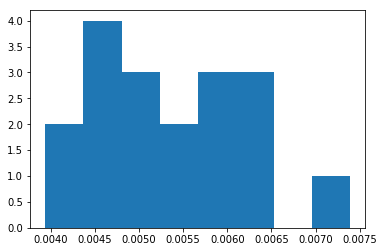

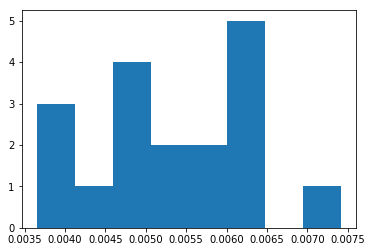

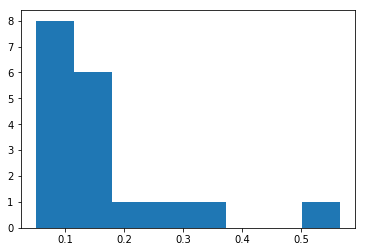

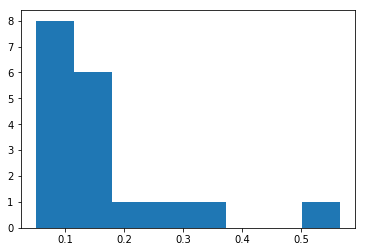

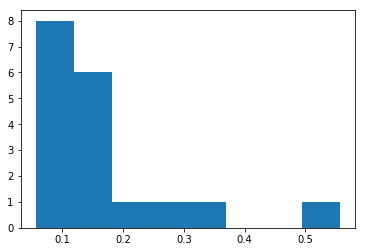

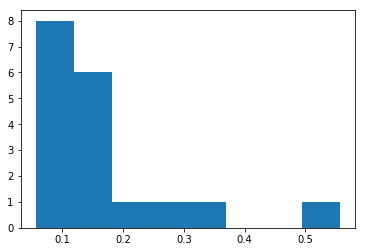

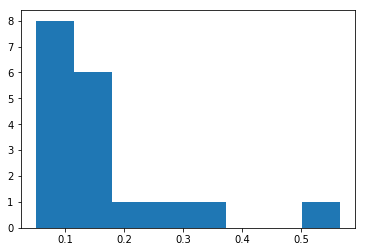

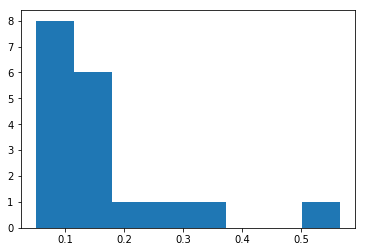

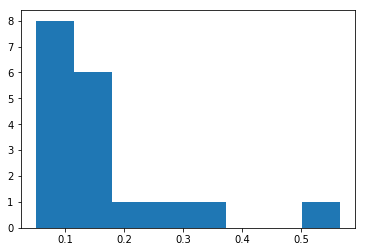

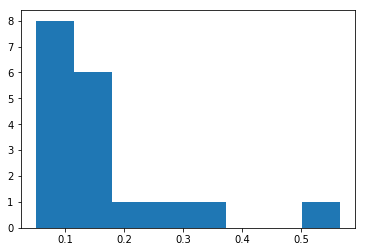

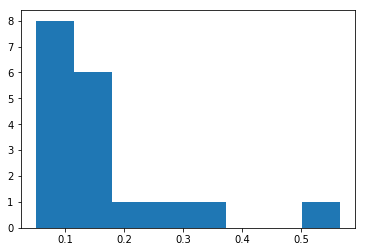

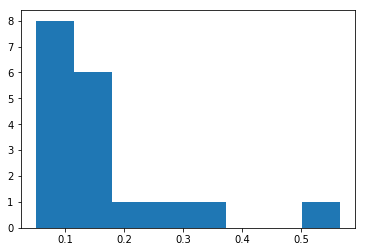

In [45]:
# check normality
for n in range(len(mFD_list)):
    plt.hist(mFD_list[n], bins = 8)
    plt.show()

In [46]:
import xlrd
xls = xlrd.open_workbook(r'~/Downloads/PhD/Analysis/QC/ARB_QC.xlsx', on_demand=True)
pipeline_names = xls.sheet_names()
pipeline_names

['MEICA_3_echo',
 'MEICA_4_echo',
 '1_echo',
 '1_echo_SDC',
 '3_echo',
 '3_echo_SDC',
 '3_echo_T2s',
 '3_echo_T2s_SDC',
 '4_echo',
 '4_echo_SDC',
 '4_echo_T2s',
 '4_echo_T2s_SDC']

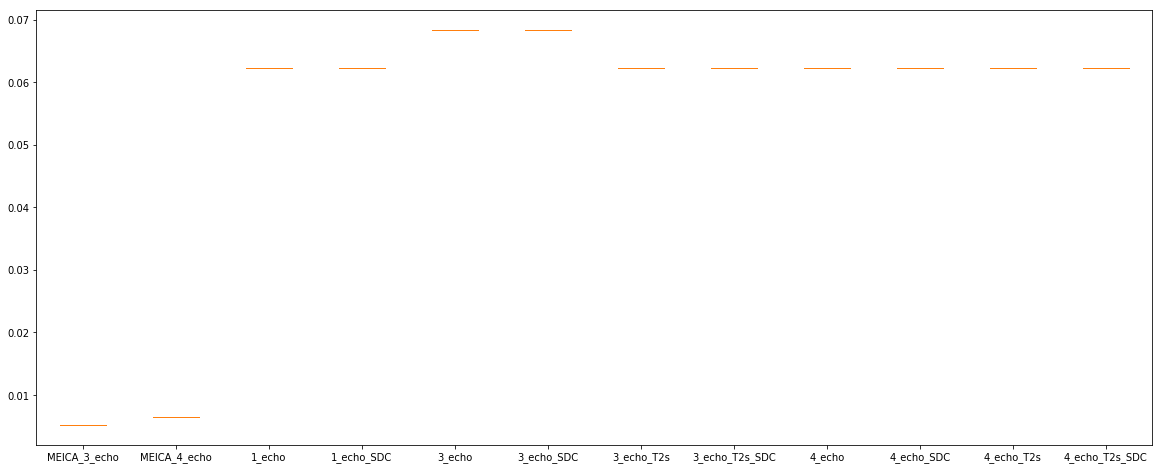

In [47]:
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

fig, ax = plt.subplots(figsize=(20,8))
mfd_figure = ax.boxplot(mFD_list, 
                          #notch=True, 
                          bootstrap=5000, 
                          showfliers=True)
ax.set_xticklabels(pipeline_names)
plt.show(mfd_figure)
#plt.savefig("dvars.png")

In [48]:
# import matplotlib.pyplot as plot
# import numpy as np
# plot all correlations
mFconn_list = sorted(glob.glob("/Users/mishodimitrov/Downloads/PhD/Analysis/QC/mFC_list_pipeline*"))
mFdisp_list = sorted(glob.glob("/Users/mishodimitrov/Downloads/PhD/Analysis/QC/mFD_list_pipeline*"))

In [ ]:
# Check normality!!


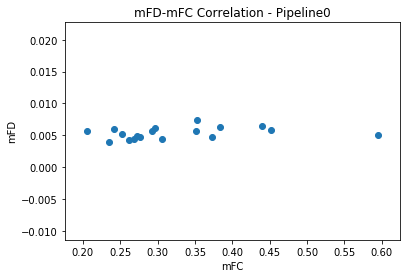

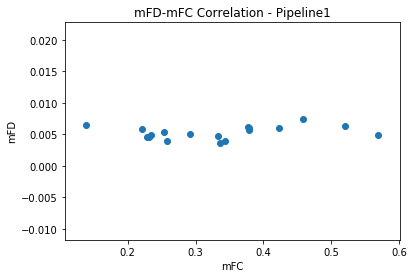

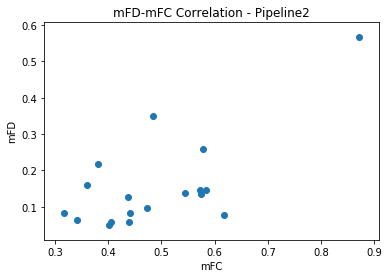

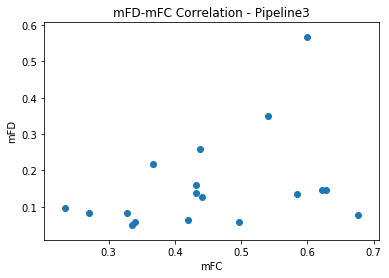

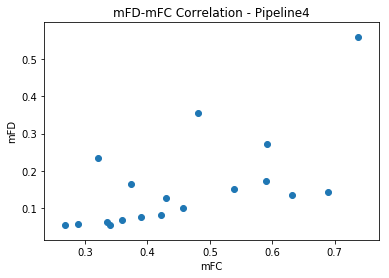

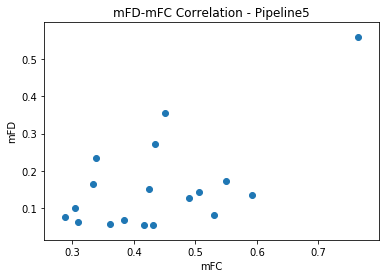

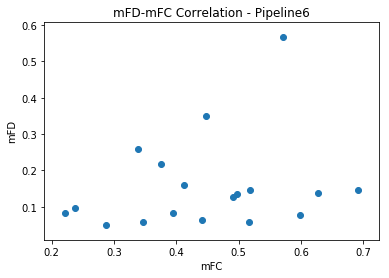

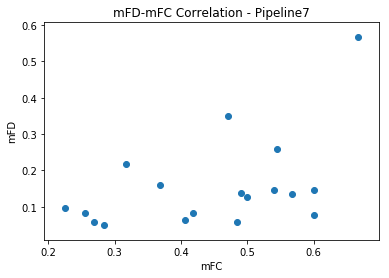

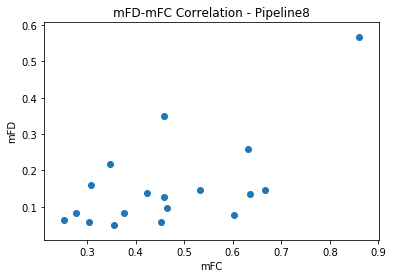

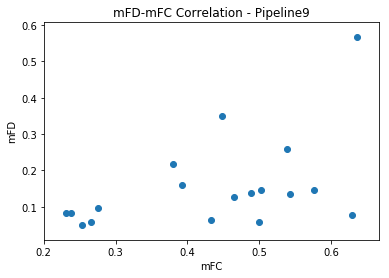

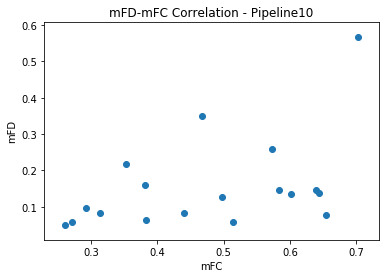

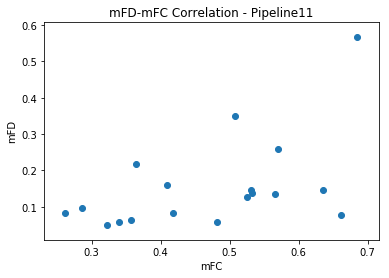

In [51]:
for n in range(len(mFconn_list)):
    mFC_list_single = pd.read_csv(mFconn_list[n], delimiter=' ', header=None)
    mFD_list_single = pd.read_csv(mFdisp_list[n], delimiter=' ', header=None)
    plt.scatter(mFC_list_single, mFD_list_single)
    plt.title('mFD-mFC Correlation - Pipeline'+str(n))
    plt.xlabel('mFC')
    plt.ylabel('mFD')
    plt.show()

In [56]:
for n in range(len(mFconn_list)):
    mFC_list_single = pd.read_csv(mFconn_list[n], delimiter=' ', header=None)
    # transpose it to make it work correctly with np.corrcoef
    mFC_list_single = mFC_list_single.T
    mFD_list_single = pd.read_csv(mFdisp_list[n], delimiter=' ', header=None)
    # transpose it to make it work correctly with np.corrcoef
    mFD_list_single = mFD_list_single.T
    r = np.corrcoef(mFC_list_single, mFD_list_single)
    print(n)
    print(r)

0
[[1.         0.26079913]
 [0.26079913 1.        ]]
1
[[1.         0.25646811]
 [0.25646811 1.        ]]
2
[[1.         0.68264634]
 [0.68264634 1.        ]]
3
[[1.         0.36811388]
 [0.36811388 1.        ]]
4
[[1.         0.62223663]
 [0.62223663 1.        ]]
5
[[1.        0.6090792]
 [0.6090792 1.       ]]
6
[[1.        0.2357256]
 [0.2357256 1.       ]]
7
[[1.         0.48293733]
 [0.48293733 1.        ]]
8
[[1.         0.62899209]
 [0.62899209 1.        ]]
9
[[1.         0.47517279]
 [0.47517279 1.        ]]
10
[[1.         0.45201734]
 [0.45201734 1.        ]]
11
[[1.         0.51036887]
 [0.51036887 1.        ]]


In [ ]:
# ?????? Hypothesis testing ????
# ?????? Compare each to each other (like the DVARS)????

In [ ]:
# subject-specific edge-wise mFD-FC

In [57]:
conn_matrix = pd.read_csv('~/Downloads/PhD/Analysis/QC/pipeline0sub_0_conn_matrix.csv', delimiter=',', header=None)
conn_matrix

0         1         2         3         4         5         6   \
0   1.000000  0.325607  0.492196  0.296988  0.161034  0.299520 -0.019986   
1   0.325607  1.000000  0.245702  0.260056  0.485832  0.517788  0.639740   
2   0.492196  0.245702  1.000000  0.495905 -0.040766  0.369652  0.051040   
3   0.296988  0.260056  0.495905  1.000000  0.500257  0.621260  0.381245   
4   0.161034  0.485832 -0.040766  0.500257  1.000000  0.665984  0.690984   
5   0.299520  0.517788  0.369652  0.621260  0.665984  1.000000  0.613647   
6  -0.019986  0.639740  0.051040  0.381245  0.690984  0.613647  1.000000   
7   0.290736  0.551026  0.612654  0.210846  0.114556  0.465702  0.314134   
8   0.171962  0.467006  0.487616  0.125365  0.020077  0.345483  0.368122   
9   0.296182  0.294728  0.550754  0.101577 -0.188341  0.335990  0.111776   
10  0.267693  0.288196  0.634985  0.075726 -0.108125  0.191262  0.076253   
11  0.296428  0.021335  0.622488  0.100682 -0.318139  0.128425 -0.227866   
12  0.258737  0.437488  0.350194  0.474112  0.349629  0.591613  0.395376   
13  0.328669  0.303501  0.540635  0.049432 -0.060803  0.336828  0.047267   
14  0.297453  0.213505  0.499917  0.146952 -0.055624  0.283265 -0.061648   
15  0.065097  0.469946  0.041364  0.374096  0.589674  0.367176  0.635589   
16 -0.007963  0.549274  0.054498  0.144149  0.406669  0.325834  0.796453   
17 -0.322414  0.163137 -0.209717  0.158038  0.242371  0.011224  0.503453   
18  0.037878  0.424681 -0.112570  0.364541  0.637197  0.326330  0.609060   
19  0.258518  0.494775  0.199623  0.699509  0.563793  0.588583  0.576532   
20  0.411655  0.110917  0.660317  0.627843 -0.027767  0.257023 -0.049189   
21 -0.251950  0.035736 -0.136390  0.206142  0.295753  0.005382  0.336835   
22  0.029256  0.365021  0.090192  0.216266  0.288639  0.277713  0.525101   
23 -0.105075  0.218928 -0.035075  0.182071  0.371576  0.160256  0.347899   
24 -0.072713  0.211514  0.357126  0.023997  0.022254  0.008246  0.189969   
25  0.090664  0.589551  0.319255  0.217851  0.363837  0.512180  0.680484   
26  0.038633  0.438615  0.290331  0.062726  0.129818  0.131899  0.384132   
27  0.566978  0.329219  0.740047  0.140737 -0.184229  0.111014 -0.031022   
28  0.508215  0.493515  0.626329  0.138858 -0.023083  0.186105  0.145546   
29  0.115715  0.097887  0.267663 -0.013774 -0.237229 -0.250138 -0.035620   
30 -0.059869 -0.122190  0.335643 -0.057414 -0.342362 -0.368335 -0.151210   
31 -0.128201  0.184541 -0.035519  0.047902  0.284408  0.027058  0.293954   
32  0.368804  0.529342  0.673029  0.413833  0.261844  0.645144  0.325207   
33  0.228658  0.517861  0.387170  0.058631  0.146260  0.239180  0.224346   
34 -0.011059  0.372918  0.091368 -0.168758  0.133101 -0.022146  0.302176   
35 -0.159469  0.313043 -0.042298  0.125430  0.352126  0.136690  0.474225   
36  0.230836  0.539797  0.409464  0.317800  0.376369  0.456245  0.451677   
37  0.109166  0.607279  0.134943  0.059206  0.346722  0.283390  0.450747   
38  0.009196  0.432408  0.005042  0.111156  0.350490  0.227408  0.526124   
39 -0.008982  0.351668  0.046559  0.282443  0.387633  0.360866  0.527476   
40  0.315994  0.822614  0.168659  0.393748  0.632026  0.730980  0.681655   
41  0.186089  0.731585  0.065536  0.001043  0.305545  0.397735  0.610285   
42  0.018560  0.563494  0.062066 -0.141905  0.039637  0.151362  0.470501   
43  0.191670  0.765024  0.254412  0.104211  0.234005  0.408183  0.580400   
44  0.147278  0.587465  0.152329  0.012245  0.074618  0.188688  0.341494   
45  0.107291  0.569026  0.155499  0.033988  0.080168  0.206560  0.463541   
46 -0.120270  0.155950 -0.032432  0.116529  0.336148  0.099982  0.280849   
47  0.001346  0.350016  0.005268  0.196840  0.378452  0.262513  0.477972   

          7         8         9   ...        38        39        40        41  \
0   0.290736  0.171962  0.296182  ...  0.009196 -0.008982  0.315994  0.186089   
1   0.551026  0.467006  0.294728  ...  0.432408  0.351668  0.822614  0.731585   
2   0.612654  0.487616  0.550754  ...  0.0

In [ ]:
# for pipeline 0:
# iterate through a specific edge for all 18 participants
# SHOULD I?????? ----- ...... !!!!!!!!!!!! if the FC values are above 0.25 !!!!!!!!!!!!
# correlate the 18 edge values with the 18 mFD values for that pipeline
# plot the distribution of 2304 values and get mean/median and 95%CI/quarters
# scale it up to include all pipelines
# plot only the mean/median and 95%CI/quarters for each separate pipeline

In [65]:
#for i in range (len(conn_matrix)):
#    for j in range(len(conn_matrix)):
#        fc = conn_matrix.iloc[i, j]
#        r = np.corrcoef(fc, mFD_val)
#        conn_matrix.iloc[i, j] = r
#print(conn_matrix)